Overview of what is being done:

Import Nesserry Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
bitcoin=pd.read_csv("bitcoin.csv")


Overall View of Dataset


In [15]:
bitcoin.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean up the data and use certain variables such as 'High','Low', and Timestamp. Do note that I am using the average of hight and low, thus the values have been added up and divided by 2


In [18]:
bitcoin['price'] = (bitcoin['High']+ bitcoin['Low'])/2
bitcoin.drop(['Open','Close','Volume_(BTC)','Volume_(Currency)', 'Weighted_Price','High','Low'],axis=1, inplace=True)

bitcoin['Timestamp'] = pd.to_datetime(bitcoin['Timestamp'],unit='s')
bitcoin = bitcoin.set_index('Timestamp')
bitcoin = bitcoin.resample('6H').mean()
bitcoin = bitcoin.dropna()



View data after unnesserry data has been dropped

In [20]:
bitcoin.head(10)

,price
Timestamp,
2011-12-31 06:00:00,4.390000
2011-12-31 12:00:00,4.501667
2012-01-01 00:00:00,4.580000
2012-01-01 12:00:00,4.840000
2012-01-01 18:00:00,5.000000
2012-01-02 18:00:00,5.000000
2012-01-03 06:00:00,5.320000
2012-01-03 12:00:00,5.242857
2012-01-04 00:00:00,4.930000


View of what the data looks like in plt plot

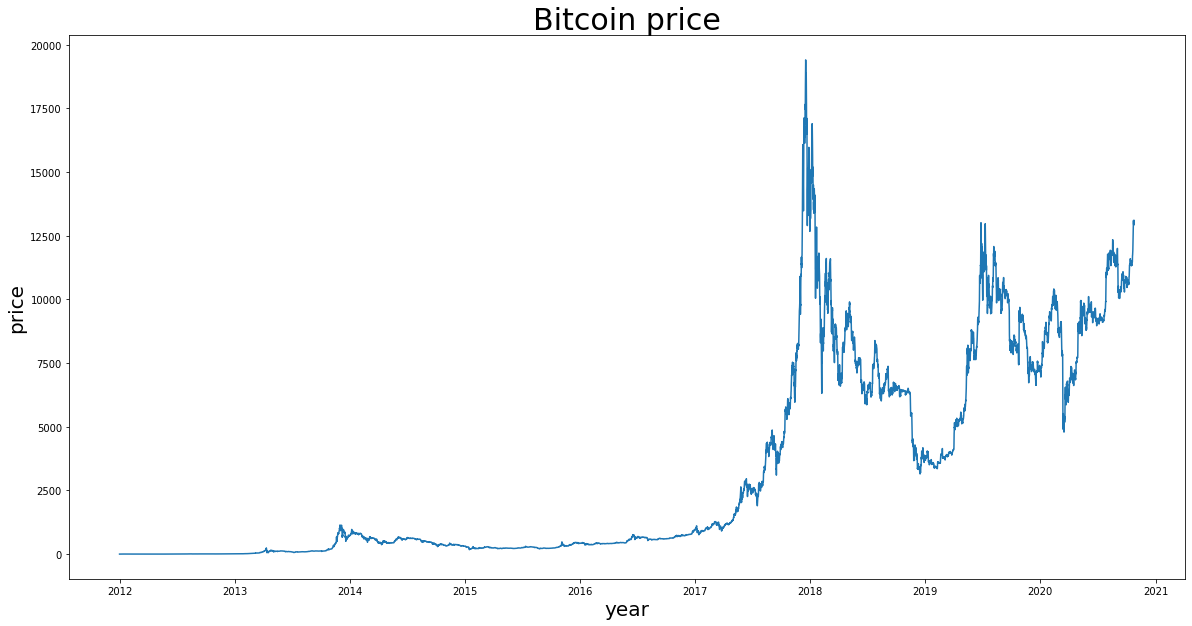

In [23]:
plt.figure(figsize=(20,10))
plt.plot(bitcoin)
plt.title('Bitcoin price',fontsize=30)
plt.xlabel('year',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

Additional Information about the data for better understanding

In [35]:
price = bitcoin['price']
max_value = price.max()
min_value = price.min()
avg_value=price.mean()

print(max_value, ' is the maximum  price of bitcoin ')
print(min_value,  ' is the minimum price of bitcoin')
print(avg_value, 'is the average price of bitcoin')

## Facing error when trying to see what days were the highest and lowest


19396.67961111111  is the maximum  price of bitcoin 
4.263125  is the minimum price of bitcoin
3209.308271575947 is the average price of bitcoin


Using Scalar to get values in 0's and 1's for price

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import models, layers


In [42]:
scaler = MinMaxScaler()
price = scaler.fit_transform(np.array(bitcoin['price']).reshape(-1,1))
bitcoin['price'] = price


Testing 1 date based on what done above to check if code works. In this test I will predict price for 1 date based on price of 100 dates.

In [44]:
X_l = []
y_l = []
Number = len(bitcoin)
Dates = 100
for i in range(Number-Dates-1):
    X_l.append(bitcoin.iloc[i:i+Dates])
    y_l.append(bitcoin.iloc[i+Dates])
    
X = np.array(X_l)
y = np.array(y_l)

print(X.shape, y.shape)

# 12646 is the price for 1 day based on 100 days

(12646, 100, 1) (12646, 1)


Splitting Data into 2 parts

Part A will be data from 2012 to 2016

Part B will be data from 2017 to 2022


Part A

In [62]:
parta=bitcoin.loc[(bitcoin['Timestamp'] <2017-1-1)]

,price
Timestamp,
2011-12-31 06:00:00,0.000007
2011-12-31 12:00:00,0.000012
2012-01-01 00:00:00,0.000016
2012-01-01 12:00:00,0.000030
2012-01-01 18:00:00,0.000038
...,...
2020-10-23 18:00:00,0.665627
2020-10-24 00:00:00,0.668562
2020-10-24 06:00:00,0.668557
